In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("census_income.csv")

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.describe(include='all')


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:>

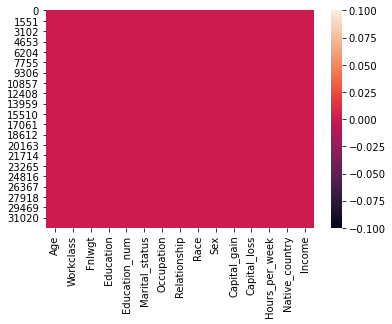

In [14]:
sns.heatmap(df.isnull())


In [15]:
# There are some missing values in the datset which are represented by '?'
# Let's convert them to NaNs
df[df == ' ?'] = np.nan

In [16]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

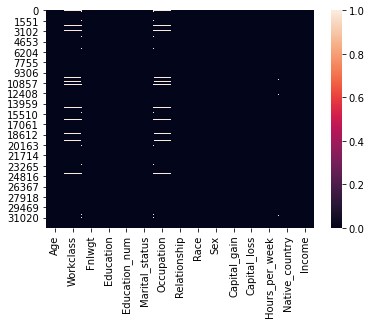

In [17]:
sns.heatmap(df.isnull())


In [18]:
df.isnull().mean()

Age               0.000000
Workclass         0.056388
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        0.056603
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    0.017905
Income            0.000000
dtype: float64

# EDA

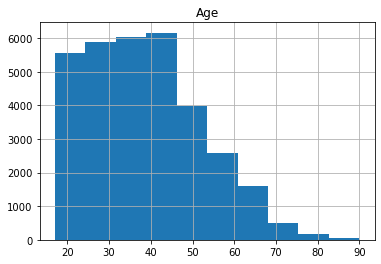

In [19]:
# Univariant Analysis
df['Age'].hist(grid=True)
plt.title('Age')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

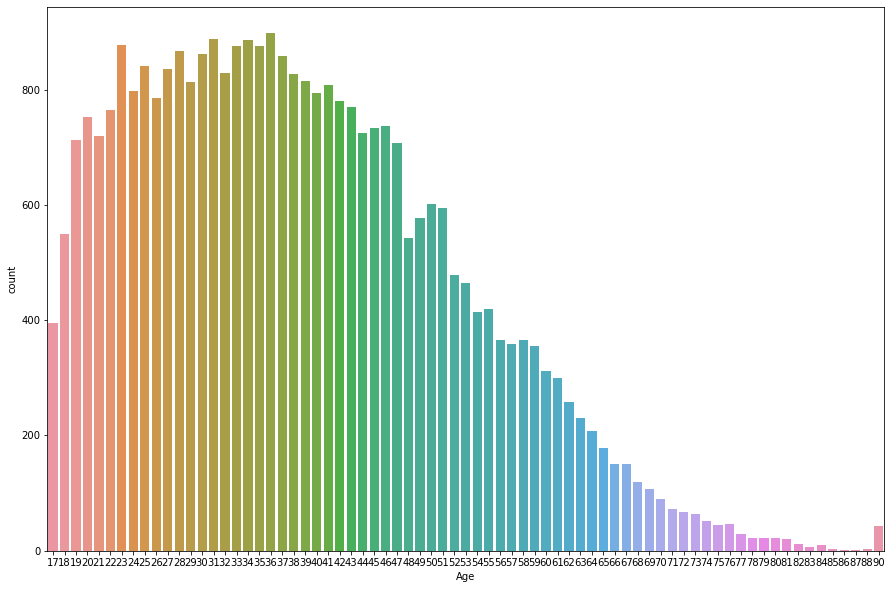

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df.Age)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

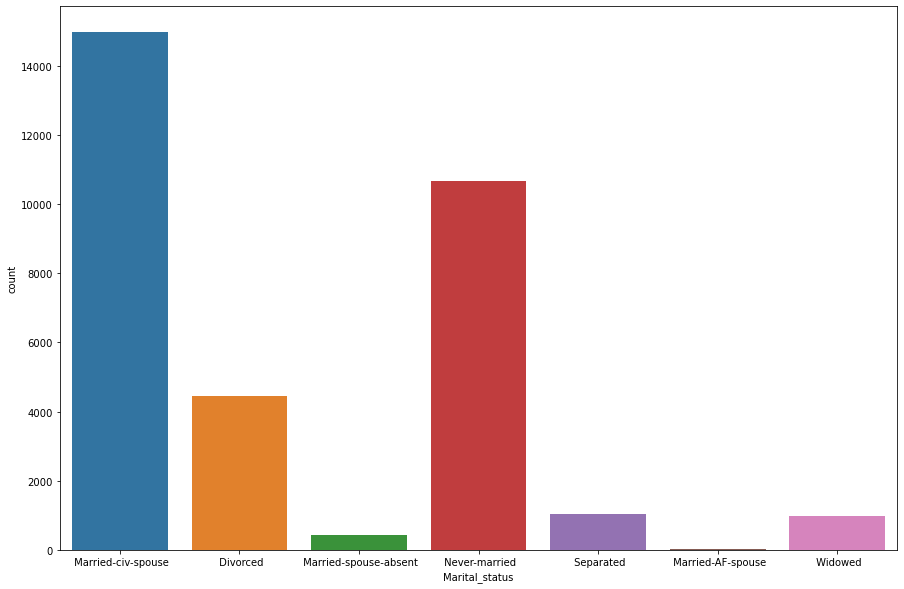

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(df.Marital_status)

<AxesSubplot:xlabel='Education', ylabel='count'>

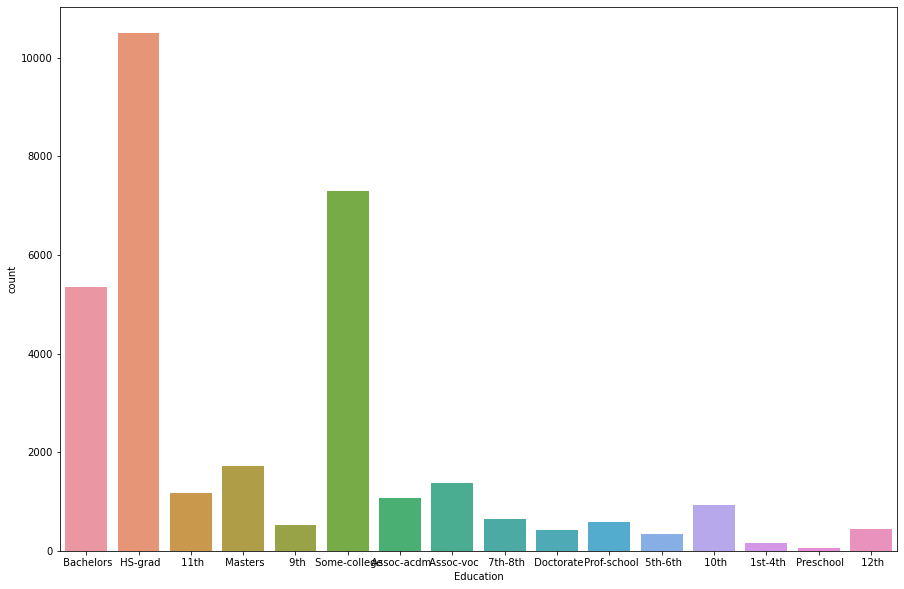

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(df.Education)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

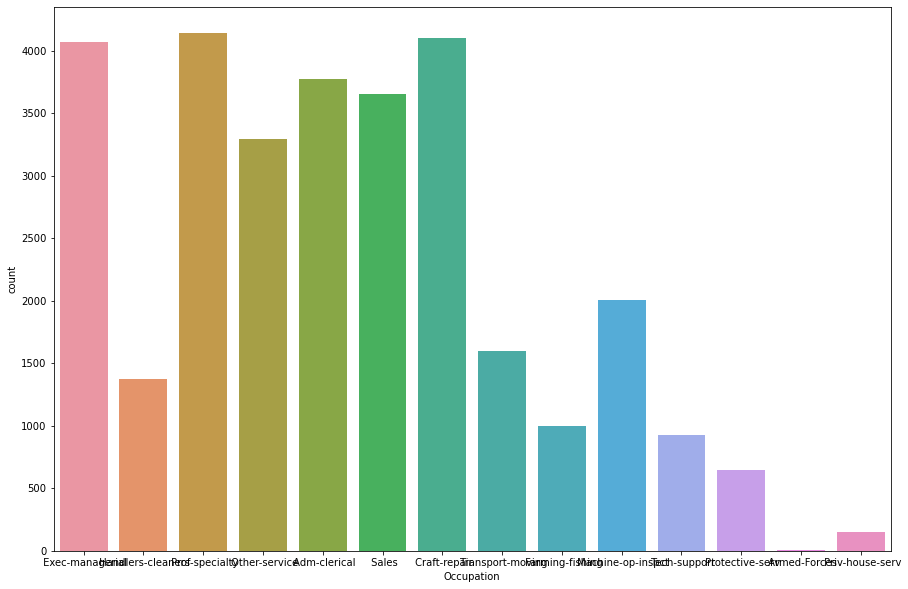

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(df.Occupation)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

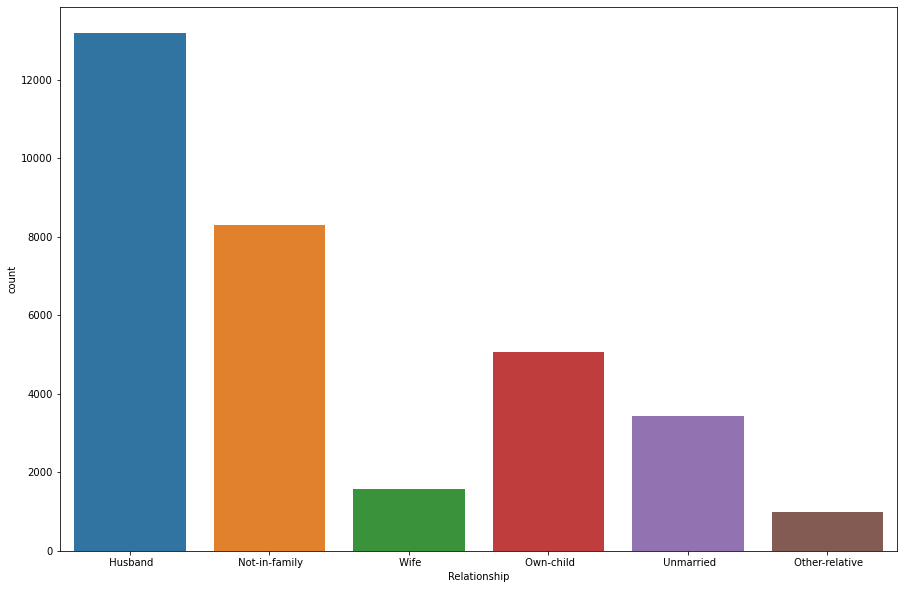

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df.Relationship)

<AxesSubplot:xlabel='Race', ylabel='count'>

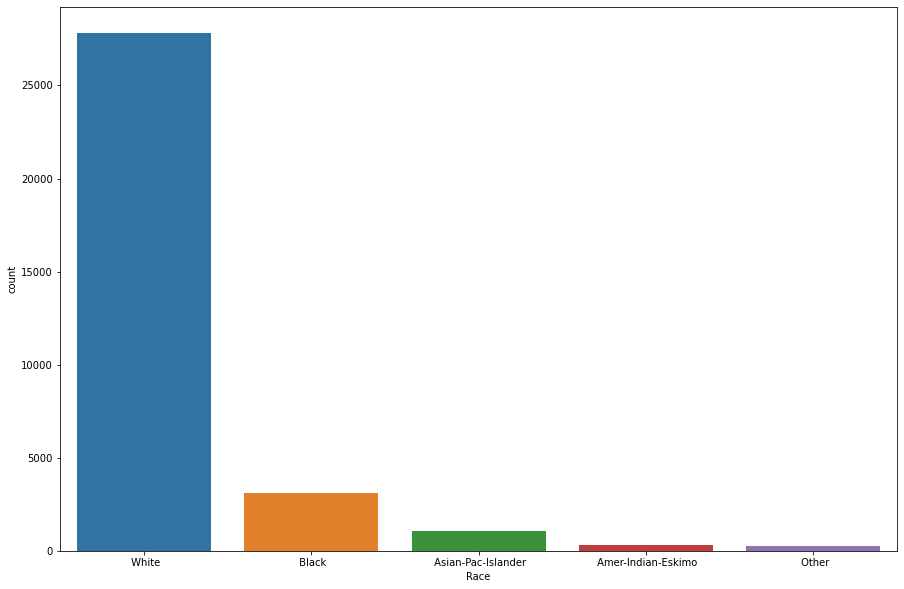

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(df.Race)

<AxesSubplot:xlabel='Sex', ylabel='count'>

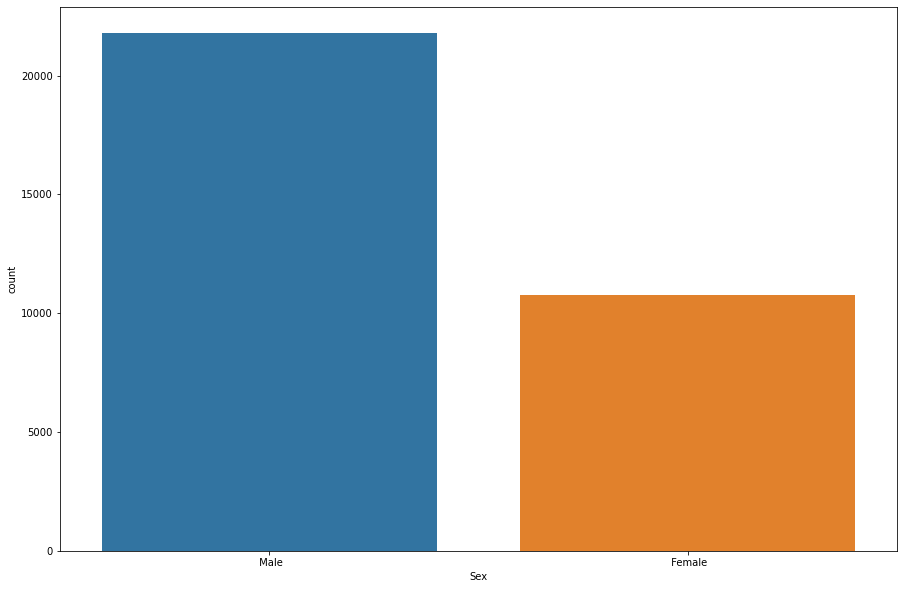

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(df.Sex)

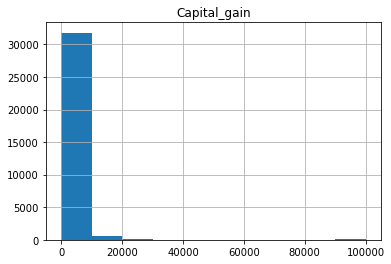

In [27]:
df["Capital_gain"].hist(grid=True)
plt.title("Capital_gain")
plt.show()

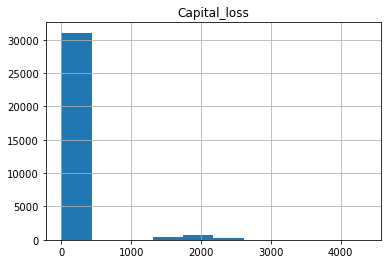

In [28]:
df["Capital_loss"].hist(grid=True)
plt.title("Capital_loss")
plt.show()

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

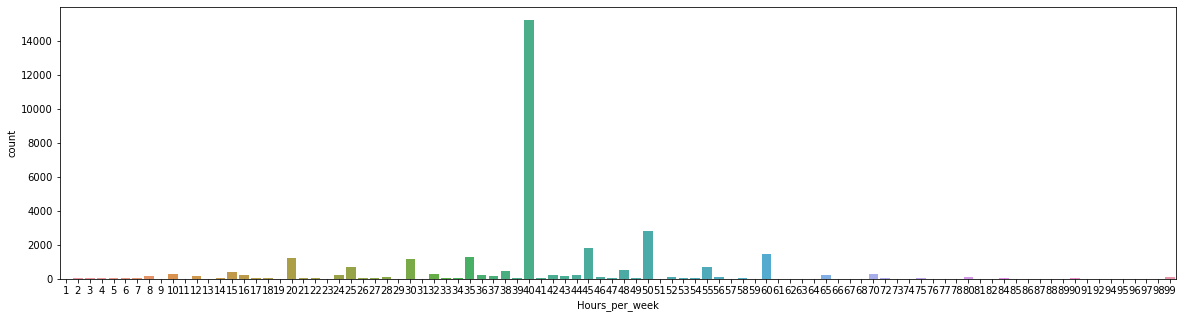

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(df.Hours_per_week)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

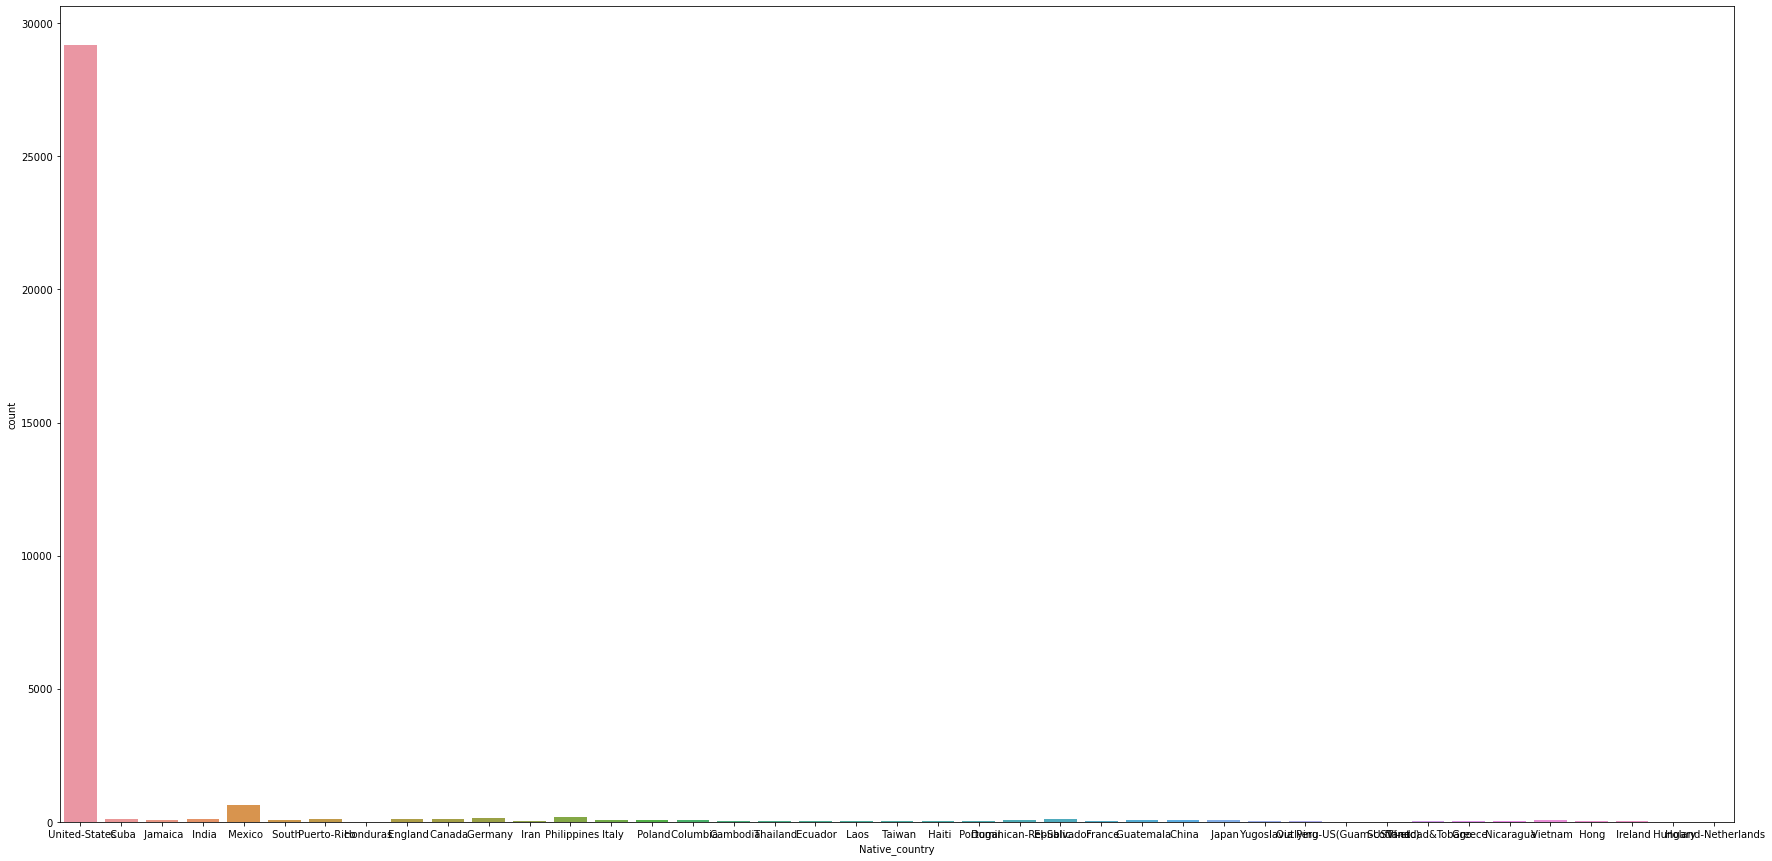

In [30]:
plt.figure(figsize=(30,15))
sns.countplot(df.Native_country)

<AxesSubplot:xlabel='Income', ylabel='count'>

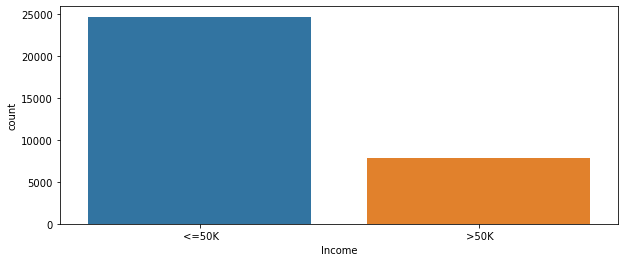

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(df.Income)

We see that more people earn <=50k



# BiVariate Analysis


<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

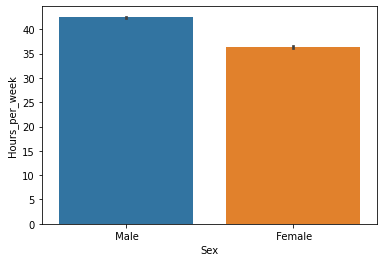

In [32]:
sns.barplot(df.Sex,df['Hours_per_week'])

<AxesSubplot:xlabel='Age', ylabel='count'>

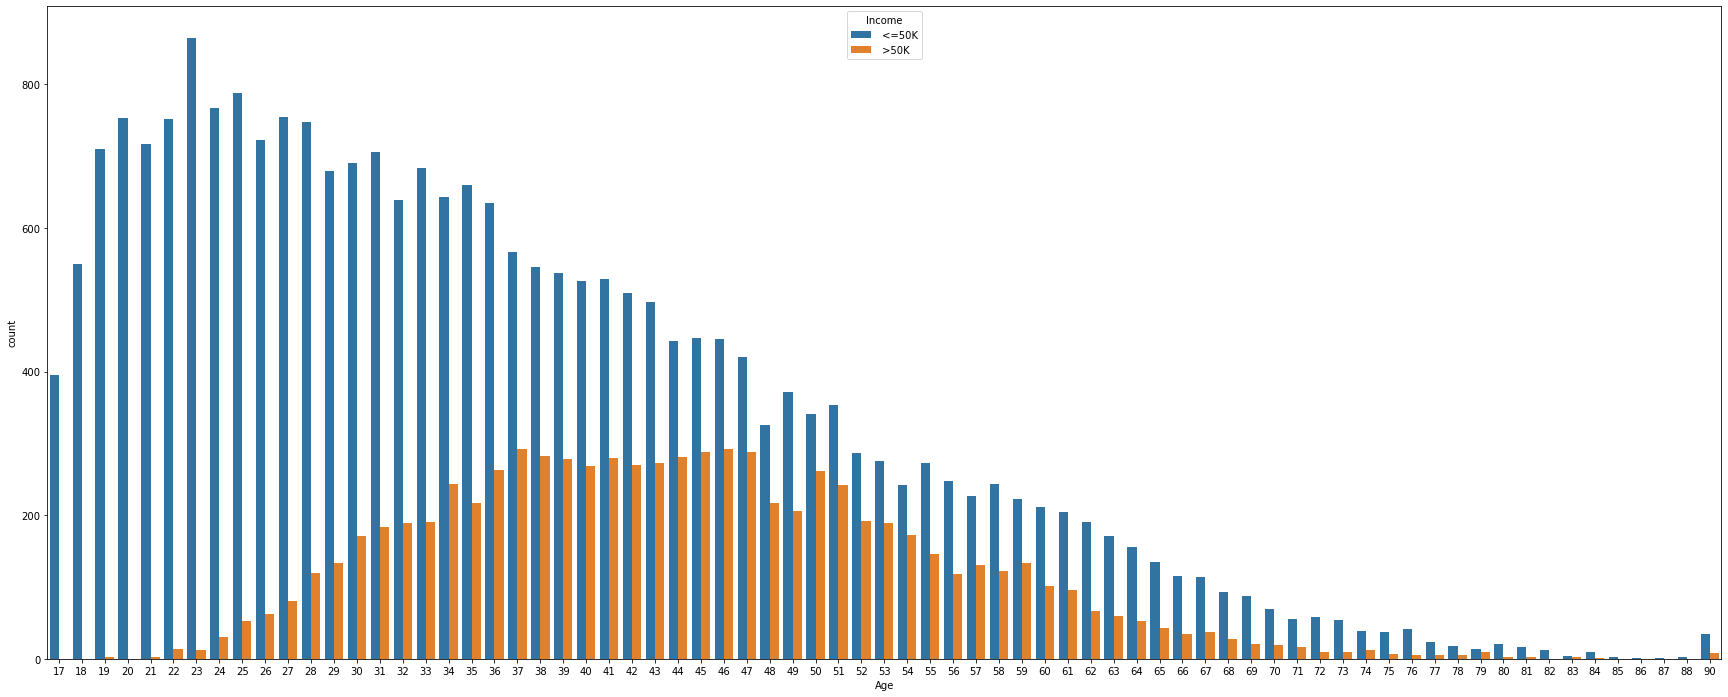

In [33]:
plt.figure(figsize=(30,12))
sns.countplot(df['Age'],hue=df.Income)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

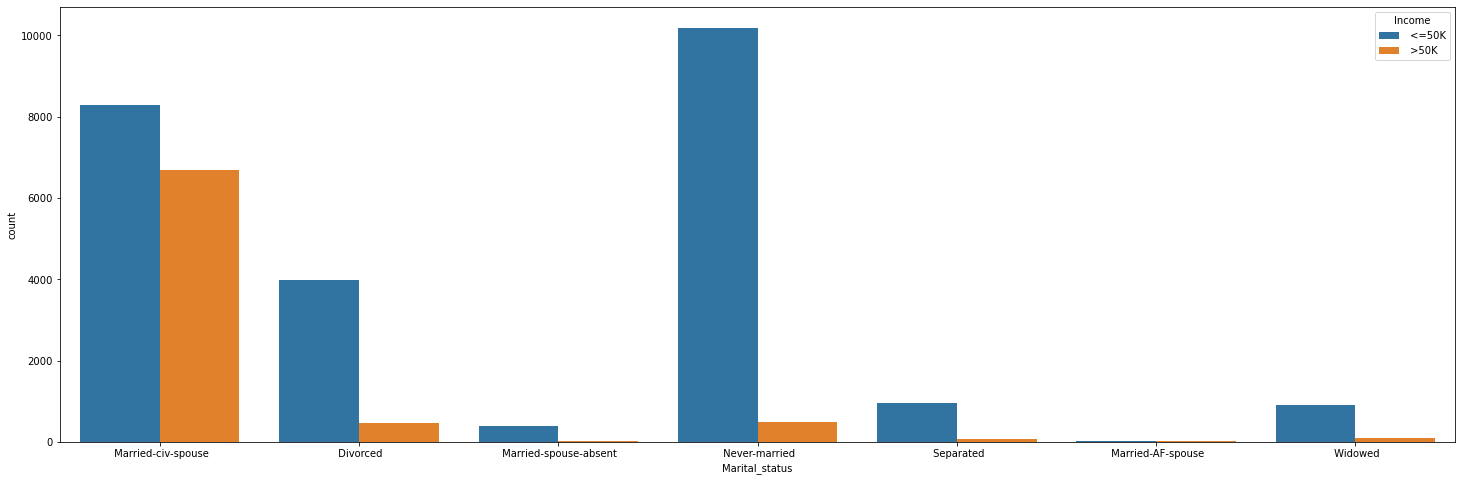

In [34]:
plt.figure(figsize=(25,8))
sns.countplot(df['Marital_status'],hue=df.Income)

<AxesSubplot:xlabel='Education', ylabel='count'>

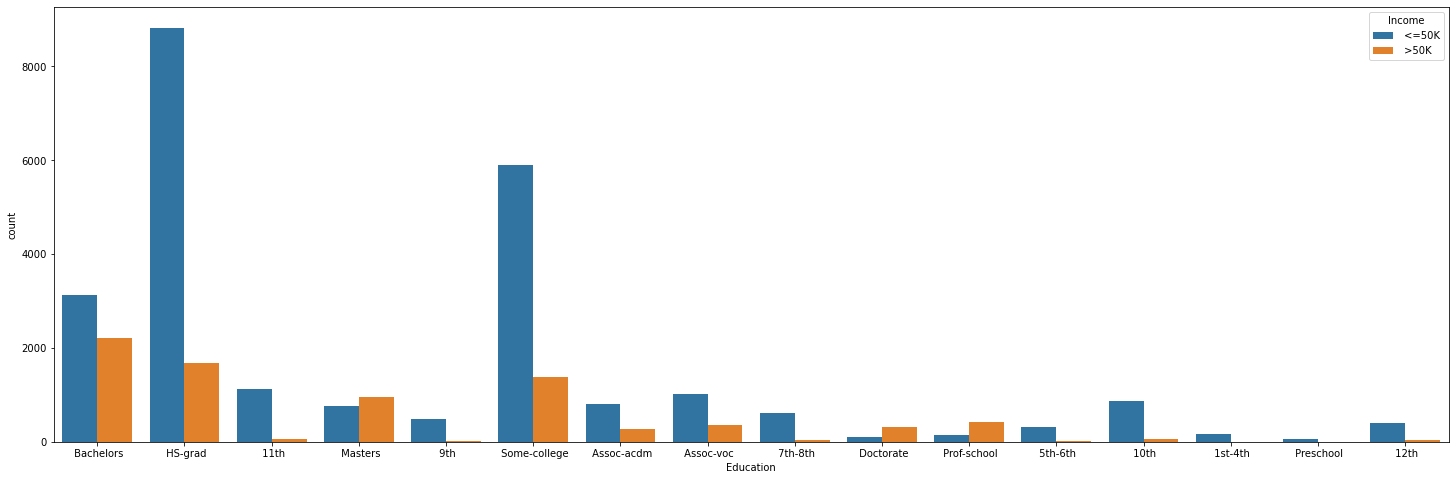

In [35]:
plt.figure(figsize=(25,8))
sns.countplot(df['Education'],hue=df.Income)

<AxesSubplot:xlabel='Race', ylabel='count'>

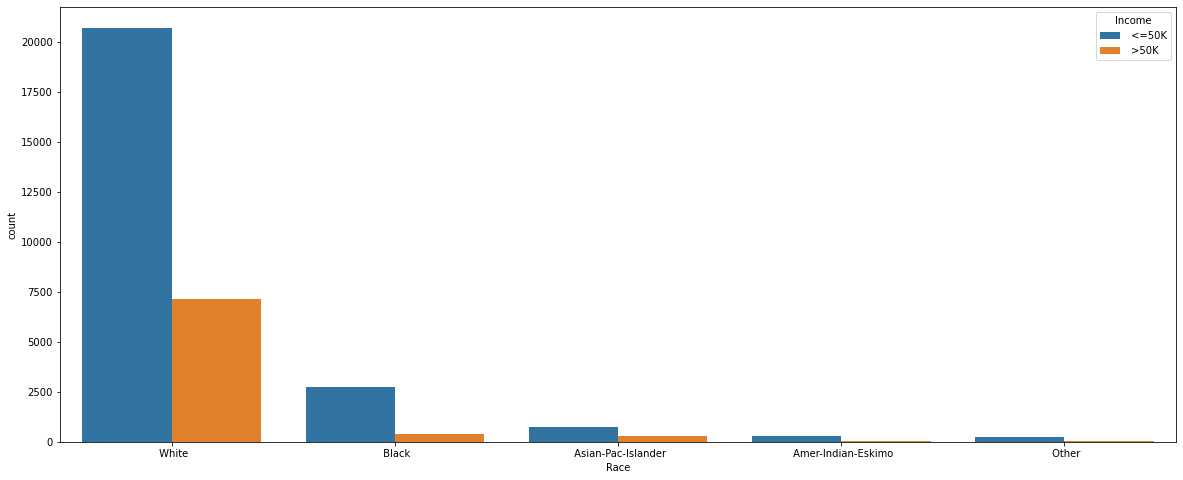

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(df['Race'],hue=df.Income)

We see that more White people earn less than 50k and while earning people more than 50k are also white

We need to encode the data

In [37]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [43]:
coumns=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']


In [44]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
#We Don't require Fnlwgt,Education to predict the income
df1=df.drop(["Fnlwgt","Education"],axis=1)

In [46]:
df1.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='Income', ylabel='count'>

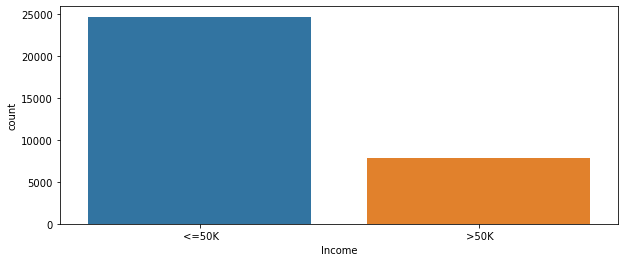

In [47]:
plt.figure(figsize=(10,4))
sns.countplot(df1.Income)